# Starts from here

In [ ]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/ChestCT/masks.zip" "/content/"

In [ ]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/ChestCT/study.zip" "/content/"

In [ ]:
!unzip /content/masks.zip
!unzip /content/study.zip

Archive:  /content/masks.zip
   creating: masks/
  inflating: masks/study_0280_mask.nii  
  inflating: masks/study_0255_mask.nii  
  inflating: masks/study_0256_mask.nii  
  inflating: masks/study_0257_mask.nii  
  inflating: masks/study_0258_mask.nii  
  inflating: masks/study_0259_mask.nii  
  inflating: masks/study_0260_mask.nii  
  inflating: masks/study_0261_mask.nii  
  inflating: masks/study_0262_mask.nii  
  inflating: masks/study_0263_mask.nii  
  inflating: masks/study_0264_mask.nii  
  inflating: masks/study_0265_mask.nii  
  inflating: masks/study_0266_mask.nii  
  inflating: masks/study_0267_mask.nii  
  inflating: masks/study_0268_mask.nii  
  inflating: masks/study_0269_mask.nii  
  inflating: masks/study_0270_mask.nii  
  inflating: masks/study_0271_mask.nii  
  inflating: masks/study_0272_mask.nii  
  inflating: masks/study_0273_mask.nii  
  inflating: masks/study_0274_mask.nii  
  inflating: masks/study_0275_mask.nii  
  inflating: masks/study_0276_mask.nii  
  inflat

In [ ]:
study_path = '/content/study/'
mask_path = '/content/masks/'

study_files = sorted(glob.glob(os.path.join(study_path, '*.nii')))
mask_files = sorted(glob.glob(os.path.join(mask_path, '*.nii')))

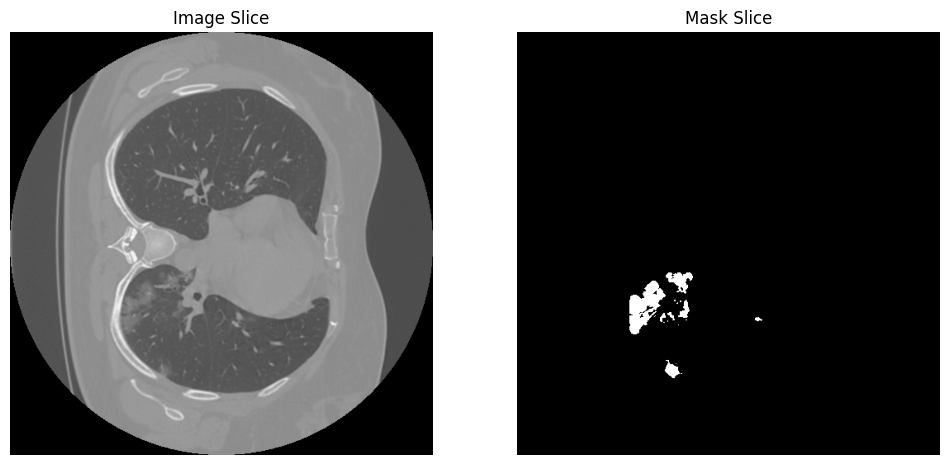

In [ ]:
sample_index = 25
image_file = study_files[sample_index]
mask_file = mask_files[sample_index]

image_data = nib.load(image_file).get_fdata()
mask_data = nib.load(mask_file).get_fdata()

slice_index = image_data.shape[2] // 2

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image_data[:, :, slice_index], cmap='gray')
axs[0].set_title('Image Slice')
axs[0].axis('off')

axs[1].imshow(mask_data[:, :, slice_index], cmap='gray')
axs[1].set_title('Mask Slice')
axs[1].axis('off')

plt.show()

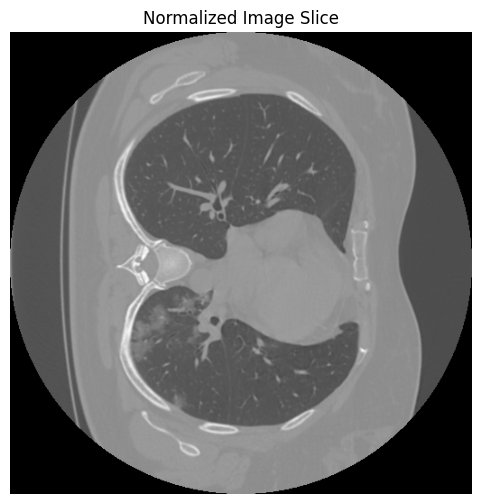

In [ ]:
def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

normalized_image_data = normalize_image(image_data)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(normalized_image_data[:, :, slice_index], cmap='gray')
ax.set_title('Normalized Image Slice')
ax.axis('off')
plt.show()

In [ ]:
# images and masks into a single array
combined_data = np.stack((normalized_image_data, mask_data), axis=-1)
combined_data = combined_data[56:184, 56:184, 13:141]  # for now cropping to same size as Glioma (aint right tho)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
output_images_dir = '/content/input_data_3channels/images/'
output_masks_dir = '/content/input_data_3channels/masks/'

os.makedirs(output_images_dir, exist_ok=True)
os.makedirs(output_masks_dir, exist_ok=True)

for img_index in range(len(study_files)):
    print("Preparing image and mask number:", img_index)

    temp_image = nib.load(study_files[img_index]).get_fdata()
    temp_mask = nib.load(mask_files[img_index]).get_fdata().astype(np.uint8)

    temp_image = scaler.fit_transform(temp_image.reshape(-1, temp_image.shape[-1])).reshape(temp_image.shape)

    temp_mask[temp_mask == 4] = 3

    temp_combined_images = np.stack([temp_image], axis=-1)

    temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    unique_values, counts = np.unique(temp_mask, return_counts=True)
    if (1 - (counts[0] / counts.sum())) > 0.01:
        temp_mask = to_categorical(temp_mask, num_classes=4)
        np.save(os.path.join(output_images_dir, f'image_{img_index}.npy'), temp_combined_images)
        np.save(os.path.join(output_masks_dir, f'mask_{img_index}.npy'), temp_mask)

Preparing image and mask number: 0
Preparing image and mask number: 1
Preparing image and mask number: 2
Preparing image and mask number: 3
Preparing image and mask number: 4
Preparing image and mask number: 5
Preparing image and mask number: 6
Preparing image and mask number: 7
Preparing image and mask number: 8
Preparing image and mask number: 9
Preparing image and mask number: 10
Preparing image and mask number: 11
Preparing image and mask number: 12
Preparing image and mask number: 13
Preparing image and mask number: 14
Preparing image and mask number: 15
Preparing image and mask number: 16
Preparing image and mask number: 17
Preparing image and mask number: 18
Preparing image and mask number: 19
Preparing image and mask number: 20
Preparing image and mask number: 21
Preparing image and mask number: 22
Preparing image and mask number: 23
Preparing image and mask number: 24
Preparing image and mask number: 25
Preparing image and mask number: 26
Preparing image and mask number: 27
Pr

In [ ]:
print("Number of processed images:", len(os.listdir(output_images_dir)))
print("Number of processed masks:", len(os.listdir(output_masks_dir)))

Number of processed images: 9
Number of processed masks: 9


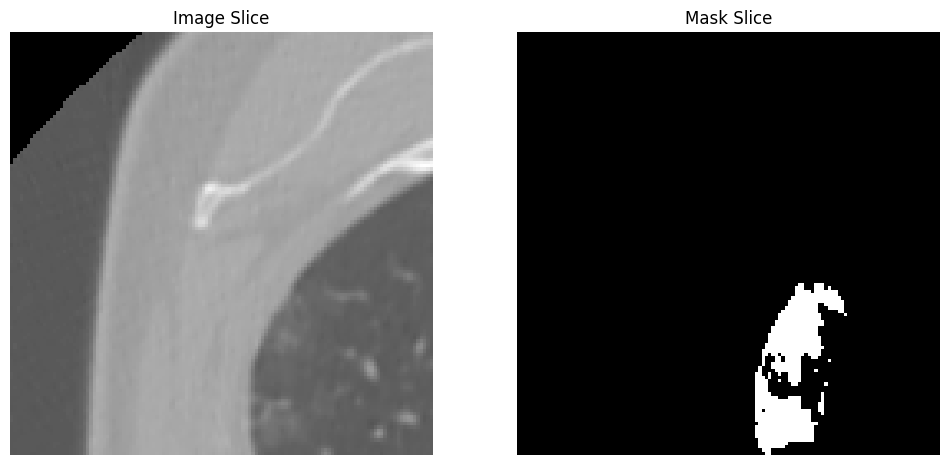

In [ ]:
sample_index = 19
loaded_image = np.load(os.path.join(output_images_dir, f'image_{sample_index}.npy'))
loaded_mask = np.load(os.path.join(output_masks_dir, f'mask_{sample_index}.npy'))

slice_index = loaded_image.shape[2] // 2

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(loaded_image[:, :, slice_index, 0], cmap='gray')
axs[0].set_title('Image Slice')
axs[0].axis('off')

axs[1].imshow(np.argmax(loaded_mask[:, :, slice_index], axis=-1), cmap='gray')
axs[1].set_title('Mask Slice')
axs[1].axis('off')

plt.show()

In [ ]:
!pip install split-folders
import splitfolders

In [ ]:
input_folder = '/content/input_data_3channels/'
output_folder = '/content/input_data_128/'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)

Copying files: 18 files [00:00, 37.62 files/s]


In [ ]:
#from tifffile import imsave, imread
import os
import numpy as np

In [ ]:
# testing the generator

from matplotlib import pyplot as plt
import random

train_img_dir = "/content/input_data_128/train/images/"
train_mask_dir = "/content/input_data_128/train/masks/"
train_img_list = sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU

kernel_initializer =  'he_uniform'

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, Conv3DTranspose, Dropout, concatenate

def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))  # Use IMG_CHANNELS = 38
    s = inputs

    # Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(c5)

    # Expansive path
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.summary()

    return model

model = simple_unet_model(128, 128, 128, 38, 4)  # 38 for channels
print(model.input_shape)
print(model.output_shape)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 128, 128, 128,  │              0 │ -                      │
│ (InputLayer)              │ 38)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_57 (Conv3D)        │ (None, 128, 128, 128,  │         16,432 │ input_layer_3[0][0]    │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_27 (Dropout)      │ (None, 128, 128, 128,  │              0 │ conv3d_57[0][0]        │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_58 (Conv3D)        │ (None, 128, 128, 128,  │          6,928 │ dropout_27[0][0]       │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_12          │ (None, 64, 64, 64, 16) │              0 │ conv3d_58[0][0]        │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_59 (Conv3D)        │ (None, 64, 64, 64, 32) │         13,856 │ max_pooling3d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_28 (Dropout)      │ (None, 64, 64, 64, 32) │              0 │ conv3d_59[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_60 (Conv3D)        │ (None, 64, 64, 64, 32) │         27,680 │ dropout_28[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_13          │ (None, 32, 32, 32, 32) │              0 │ conv3d_60[0][0]        │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_61 (Conv3D)        │ (None, 32, 32, 32, 64) │         55,360 │ max_pooling3d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_29 (Dropout)      │ (None, 32, 32, 32, 64) │              0 │ conv3d_61[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_62 (Conv3D)        │ (None, 32, 32, 32, 64) │        110,656 │ dropout_29[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_14          │ (None, 16, 16, 16, 64) │              0 │ conv3d_62[0][0]        │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_63 (Conv3D)        │ (None, 16, 16, 16,     │        221,312 │ max_pooling3d_14[0][0] │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_30 (Dropout)      │ (None, 16, 16, 16,     │              0 │ conv3d_63[0][0]        │
│                           │ 128)                   │                │                        │
├──────────────────────

 Total params: 5,660,948 (21.59 MB)

 Trainable params: 5,660,948 (21.59 MB)

 Non-trainable params: 0 (0.00 B)

(None, 128, 128, 128, 38)
(None, 128, 128, 128, 4)


In [ ]:
import os
import numpy as np
import keras
from matplotlib import pyplot as plt
import glob
import random

In [ ]:
train_img_dir = "/content/input_data_128/train/images/"
train_mask_dir = "/content/input_data_128/train/masks/"

img_list = sorted(os.listdir(train_img_dir))
msk_list = sorted(os.listdir(train_mask_dir))

num_images = len(img_list)

img_num = random.randint(0, num_images - 1)
test_img = np.load(train_img_dir + img_list[img_num])
test_mask = np.load(train_mask_dir + msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

In [ ]:
# image generators for training and validation

train_img_dir = "/content/input_data_128/train/images/"
train_mask_dir = "/content/input_data_128/train/masks/"

val_img_dir = "/content/input_data_128/val/images/"
val_mask_dir = "/content/input_data_128/val/masks/"

# train_img_list=os.listdir(train_img_dir)
# train_mask_list = os.listdir(train_mask_dir)

train_img_list = sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

# val_img_list=os.listdir(val_img_dir)
# val_mask_list = os.listdir(val_mask_dir)

val_img_list = sorted(os.listdir(val_img_dir))
val_mask_list = sorted(os.listdir(val_mask_dir))

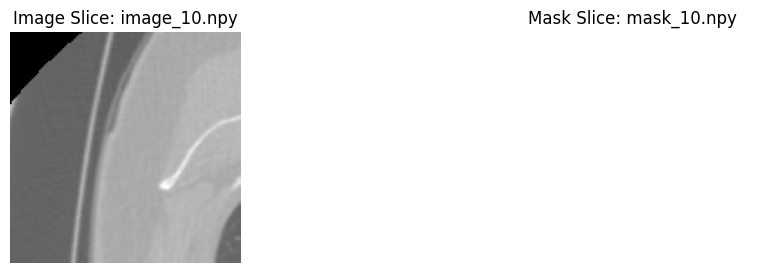

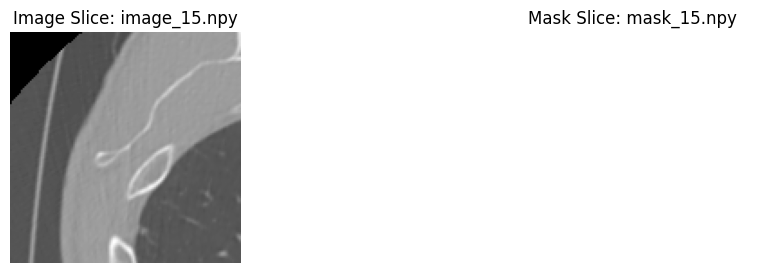

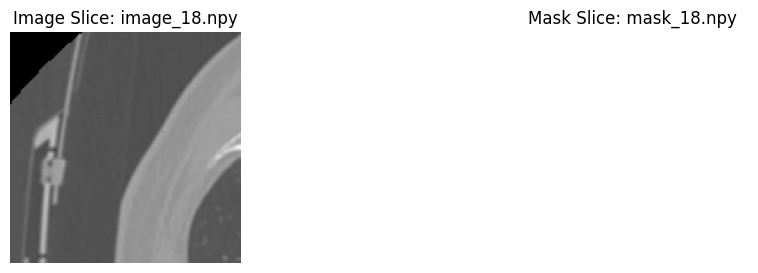

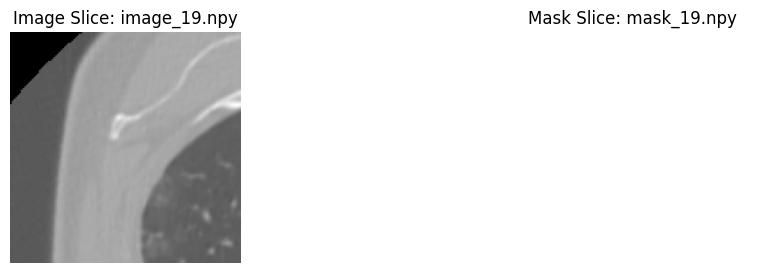

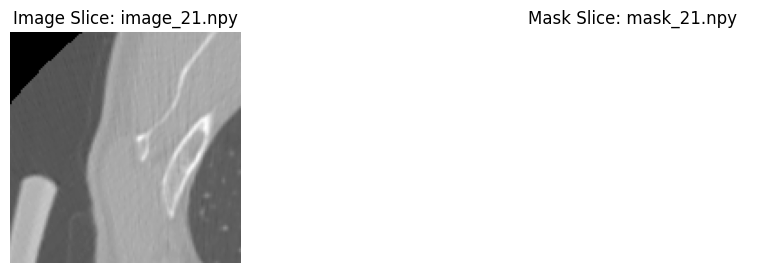

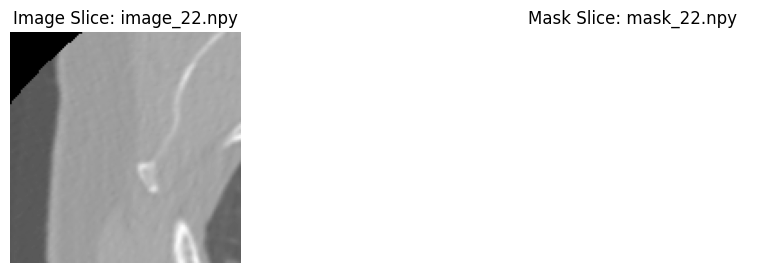

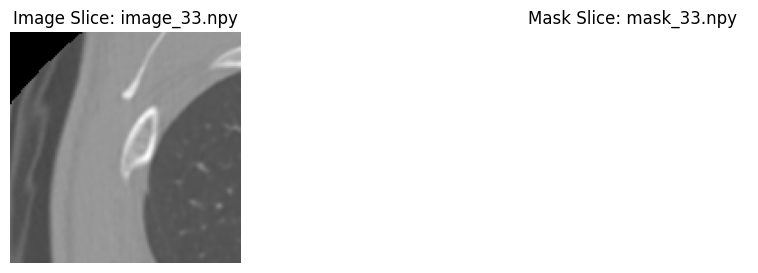

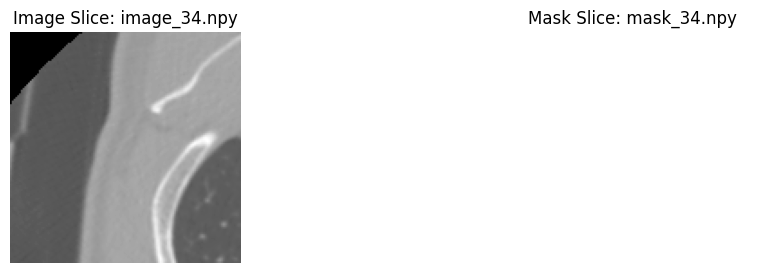

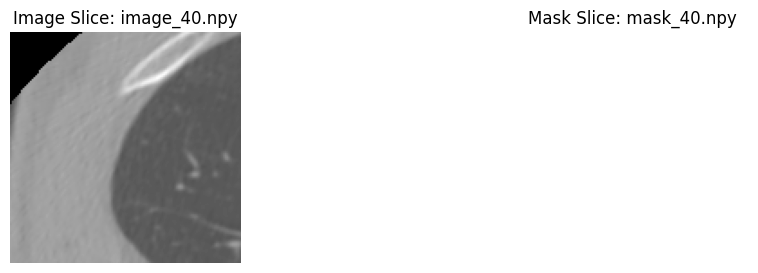

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

output_images_dir = '/content/input_data_3channels/images/'
output_masks_dir = '/content/input_data_3channels/masks/'

image_files = sorted(os.listdir(output_images_dir))
mask_files = sorted(os.listdir(output_masks_dir))

for img_file, mask_file in zip(image_files, mask_files):
    loaded_image = np.load(os.path.join(output_images_dir, img_file))
    loaded_mask = np.load(os.path.join(output_masks_dir, mask_file))

    n_slice = loaded_image.shape[2] // 2

    plt.figure(figsize=(12, 3))

    plt.subplot(121)
    plt.imshow(loaded_image[:, :, n_slice], cmap='gray')
    plt.title(f'Image Slice: {img_file}')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(loaded_mask[:, :, n_slice], cmap='gray')
    plt.title(f'Mask Slice: {mask_file}')
    plt.axis('off')

    plt.show()

In [ ]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):
    while True:
        for batch_start in range(0, len(img_list), batch_size):
            batch_end = min(batch_start + batch_size, len(img_list))
            X = load_img(img_dir, img_list[batch_start:batch_end])
            Y = load_mask(mask_dir, mask_list[batch_start:batch_end])
            yield (X, Y)

In [ ]:
import numpy as np
import os
from skimage.transform import resize

def load_img(img_dir, img_list, target_shape=(128, 128, 38)):
    images = []
    for img_file in img_list:
        img_path = os.path.join(img_dir, img_file)

        # loading the image using numpy
        image = np.load(img_path)

        # resizing image to the target shape
        image_resized = resize(image, target_shape, mode='constant', anti_aliasing=True)

        images.append(image_resized)
    return np.array(images)

def load_mask(mask_dir, mask_list, target_shape=(128, 128, 38)):
    masks = []
    for mask_file in mask_list:
        mask_path = os.path.join(mask_dir, mask_file)

        # loading the mask using numpy
        mask = np.load(mask_path)

        # resizing mask to the target shape
        mask_resized = resize(mask, target_shape, mode='constant', anti_aliasing=True)

        masks.append(mask_resized)
    return np.array(masks)

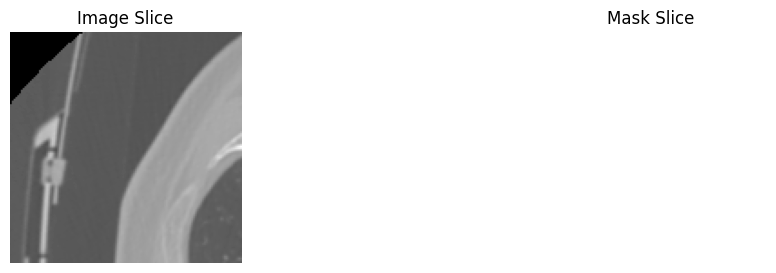

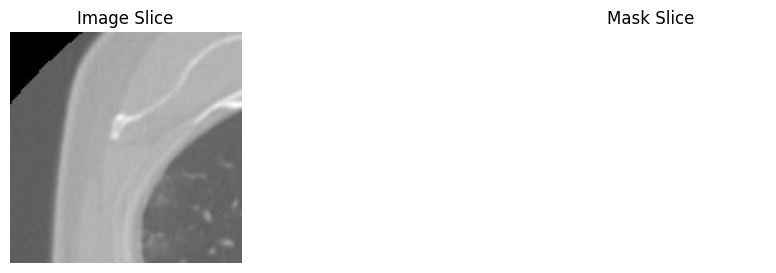

In [ ]:
import matplotlib.pyplot as plt

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                 train_mask_dir, train_mask_list, batch_size)

img, msk = next(train_img_datagen)

for img_num in range(img.shape[0]):
    test_img = img[img_num]
    test_mask = msk[img_num]

    n_slice = test_img.shape[2] // 2

    plt.figure(figsize=(12, 3))

    plt.subplot(121)
    plt.imshow(test_img[:, :, n_slice], cmap='gray')
    plt.title('Image Slice')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(test_mask[:, :, n_slice], cmap='gray')
    plt.title('Mask Slice')
    plt.axis('off')

    plt.subplots_adjust(wspace=0.3)
    plt.show()

In [ ]:
!pip install keras_applications

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install segmentation_models

In [ ]:
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = r'/content/Weight/brats_3d_best.keras'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

In [ ]:
# model.compile(optimizer=optim, loss=total_loss, metrics=metrics)
# print(model.summary())

# print(model.input_shape)
# print(model.output_shape)

# history = model.fit(train_img_datagen,
#                     steps_per_epoch=steps_per_epoch,
#                     epochs=50,
#                     verbose=1,
#                     validation_data=val_img_datagen,
#                     validation_steps=val_steps_per_epoch,
#                     callbacks=[model_checkpoint_callback])  # Add callback here

# Define the optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

optim = Adam(learning_rate=0.001)
total_loss = BinaryCrossentropy()
metrics = [BinaryAccuracy()]

model.compile(optimizer=optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 128, 128, 128,  │              0 │ -                      │
│ (InputLayer)              │ 38)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_57 (Conv3D)        │ (None, 128, 128, 128,  │         16,432 │ input_layer_3[0][0]    │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_27 (Dropout)      │ (None, 128, 128, 128,  │              0 │ conv3d_57[0][0]        │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_58 (Conv3D)        │ (None, 128, 128, 128,  │          6,928 │ dropout_27[0][0]       │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_12          │ (None, 64, 64, 64, 16) │              0 │ conv3d_58[0][0]        │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_59 (Conv3D)        │ (None, 64, 64, 64, 32) │         13,856 │ max_pooling3d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_28 (Dropout)      │ (None, 64, 64, 64, 32) │              0 │ conv3d_59[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_60 (Conv3D)        │ (None, 64, 64, 64, 32) │         27,680 │ dropout_28[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_13          │ (None, 32, 32, 32, 32) │              0 │ conv3d_60[0][0]        │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_61 (Conv3D)        │ (None, 32, 32, 32, 64) │         55,360 │ max_pooling3d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_29 (Dropout)      │ (None, 32, 32, 32, 64) │              0 │ conv3d_61[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_62 (Conv3D)        │ (None, 32, 32, 32, 64) │        110,656 │ dropout_29[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_14          │ (None, 16, 16, 16, 64) │              0 │ conv3d_62[0][0]        │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_63 (Conv3D)        │ (None, 16, 16, 16,     │        221,312 │ max_pooling3d_14[0][0] │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_30 (Dropout)      │ (None, 16, 16, 16,     │              0 │ conv3d_63[0][0]        │
│                           │ 128)                   │                │                        │
├──────────────────────

 Total params: 5,660,948 (21.59 MB)

 Trainable params: 5,660,948 (21.59 MB)

 Non-trainable params: 0 (0.00 B)

None
(None, 128, 128, 128, 38)
(None, 128, 128, 128, 4)


# Glioma compilation from Raiaan bhai

In [ ]:
!nvidia-smi

Thu May  2 00:18:01 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.12                 Driver Version: 552.12         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:26:00.0  On |                  N/A |
| 60%   55C    P3             23W /  170W |     681MiB /  12288MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = r'/content/Weight/brats_3d_best.hdf5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

model.compile(optimizer=optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

history = model.fit(train_img_datagen,
                    steps_per_epoch=steps_per_epoch,
                    epochs=50,
                    verbose=1,
                    validation_data=val_img_datagen,
                    validation_steps=val_steps_per_epoch,
                    callbacks=[model_checkpoint_callback])  # Add callback here

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

In [ ]:
# plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print("a")